# CHƯƠNG 2: QUY TRÌNH XÂY DỰNG MỘT HỆ THỐNG HỌC MÁY - PHẦN 2
----

* Mã sinh viên:
* Họ và tên:
* Lớp:
* Email:
---


# THỰC HÀNH 4
---
**Mô tả tập dữ liệu:**

Tập dữ liệu Data_practice4 chứa dữ liệu của 961 bệnh nhân bị u vú.

Mỗi bản ghi tương ứng với một bệnh nhân, Bao gồm 6 thuộc tính:
1. PatienID: Thuộc tính cho biết mã số của bệnh nhân
2. Age: Thuộc tính cho biết tuổi của bệnh nhân, dữ liệu số [18-96 tuổi]
3. Shape: Thuộc tính cho biết hình dạng của khối u, bao gồm 4 giá trị: Round, Oval, Lobular, Irregular
4. Margin: Thuộc tính cho biết dạng đường biên của khối u, bao gồm 5 giá trị: Circumscribed, Microlobulated, Obscured, ill-defined, Spiculated
5. Density: Thuộc tính cho biết mật độ của khối u, bao gồm 4 giá trị: High, Iso, Low, Fat-containing
6. Target: Thuộc tính cho biết khối u là lành tính (0) - hay ác tính (1)

**Yêu cầu 4.1:**
Đọc tập dữ liệu Data_Practice4.csv vào biến DataFrame, hiển thị thông tin của biến, 5 bản ghi đầu tiên và thống kê dữ liệu.


**Thông tin biến**

In [1]:
#{HỌC VIÊN VIẾT CODE VÀO ĐÂY!}

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
path = "Data/Data_Practice4.csv"
df_Practice = pd.read_csv(path, index_col=0)


In [2]:
df_Practice.info()

<class 'pandas.core.frame.DataFrame'>
Index: 961 entries, P1 to P961
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Age      956 non-null    float64
 1   Shape    930 non-null    object 
 2   Margin   913 non-null    object 
 3   Density  885 non-null    object 
 4   Target   961 non-null    int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 45.0+ KB


**Năm bản ghi đầu tiên**

In [3]:
df_Practice.head()

,Age,Shape,Margin,Density,Target
PatientID,,,,,
P1,67.0,Lobular,Spiculated,Low,1
P2,43.0,Round,Circumscribed,NaN,1
P3,58.0,Irregular,Spiculated,Low,1
P4,28.0,Round,Circumscribed,Low,0
P5,74.0,Round,Spiculated,NaN,1


**Thống kê dữ liệu**

Dữ liệu number

In [4]:
df_Practice.describe()

,Age,Target
count,956.000000,961.000000
mean,55.487448,0.463059
std,14.480131,0.498893
min,18.000000,0.000000
25%,45.000000,0.000000
50%,57.000000,0.000000
75%,66.000000,1.000000
max,96.000000,1.000000


Dữ liệu object

In [5]:
df_Practice.describe(include=['O'])

,Shape,Margin,Density
count,930,913,885
unique,4,5,4
top,Irregular,Circumscribed,Low
freq,400,357,798


**Yêu cầu 4.2:**
Thông kê dữ liệu missing cho từng thuộc tính, và liệt kê ra các bản ghi bị missing tương ứng với thuộc tính đó.

**% dữ liệu missing trên toàn tập dữ liệu**

In [6]:
total_missing = df_Practice.isnull().sum().sum()
total_cells = np.prod(df_Practice.shape)
percent_missing = total_missing/total_cells*100
print("Dữ liệu missing trên toàn tập dữ liệu {:.2f} %".format(percent_missing))

Dữ liệu missing trên toàn tập dữ liệu 3.33 %


**Số lượng giá trị missing từng thuộc tính**

In [7]:
def missing_values(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Số giá trị Missing', 1 : 'Tỷ lệ % missing'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        'Tỷ lệ % missing', ascending=False).round(2)
        print ("File dữ liệu bao gồm có: " + str(df.shape[1]) + " cột.\n"      
            "Có " + str(mis_val_table_ren_columns.shape[0]) +
              " cột chứa missing values.")
        return mis_val_table_ren_columns
print('Số lượng missing data trong tập Train: \n')
missing_values(df_Practice)

Số lượng missing data trong tập Train: 

File dữ liệu bao gồm có: 5 cột.
Có 4 cột chứa missing values.


,Số giá trị Missing,Tỷ lệ % missing
Density,76,7.91
Margin,48,4.99
Shape,31,3.23
Age,5,0.52


**Các bản ghi chứa missing value**

In [8]:
df_Practice[df_Practice.isnull().any(axis=1)]

,Age,Shape,Margin,Density,Target
PatientID,,,,,
P2,43.0,Round,Circumscribed,NaN,1
P5,74.0,Round,Spiculated,NaN,1
P6,65.0,Round,NaN,Low,0
P7,70.0,NaN,NaN,Low,0
P8,42.0,Round,NaN,Low,0
...,...,...,...,...,...
P779,60.0,NaN,ill-defined,Low,0
P820,35.0,Lobular,NaN,Iso,0
P825,40.0,NaN,Obscured,Fat-containing,1


**Yêu cầu 4.3:** Phân tích, thống kê - xác định mức độ ảnh hưởng của các thuộc tính độc lập [Age, Shape, Margin, Density] tới thuộc tính phụ thuộc [Target] 

**Thuộc tính Age**

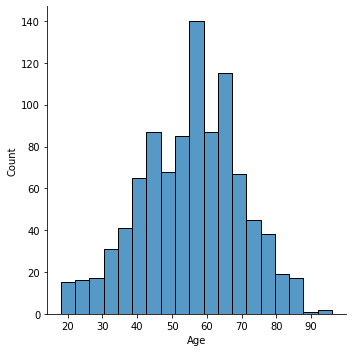

In [9]:
sns.displot(data=df_Practice.Age)

<AxesSubplot:xlabel='Target', ylabel='Age'>

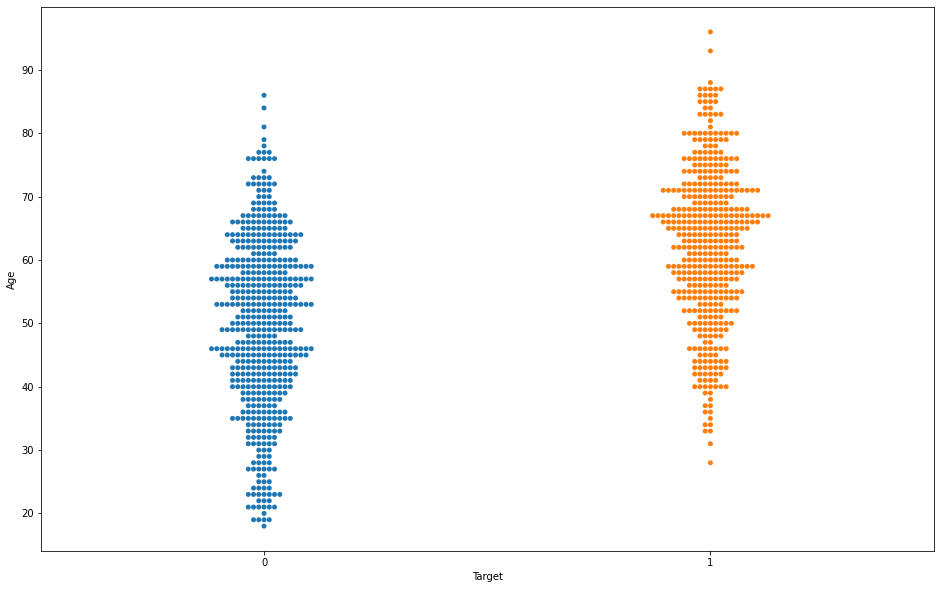

In [10]:
plt.figure(figsize=(16,10))
sns.swarmplot(x=df_Practice.Target, y=df_Practice.Age)

- Độ tuổi bệnh nhân tập chung nhiều trong khoảng 45 -> 65 tuổi
- Những bệnh nhân có độ tuổi < 30 hầu hết là khối u lành tính
- Những bệnh nhân có độ tuổi từ 50 -> 70 có tỉ lệ ác tính cao

=> Dữ liệu có ảnh hưởng tới việc khả năng mắc bệnh của người.
Cần xử lý missing và phân chia thành các nhóm

**Thuộc tính Shape**

<Figure size 1152x1440 with 0 Axes>

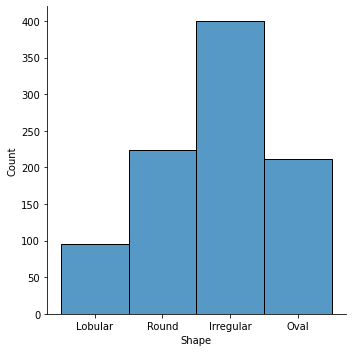

In [11]:
plt.figure(figsize=(16,20))
sns.displot(data=df_Practice.Shape)

In [12]:
#{HỌC VIÊN VIẾT CODE VÀO ĐÂY!}
df_Practice[["Shape", "Target"]].groupby(['Shape'], as_index=False).mean().sort_values(by='Target', ascending=False)

,Shape,Target
0,Irregular,0.787500
1,Lobular,0.473684
3,Round,0.169643
2,Oval,0.165877


Thuộc tính `Shape` có ảnh hưởng đến việc người bệnh có khối u lành tính hay ác tính. Hình dạng `Irregular` có tỉ lệ là khối u ác tính cao trong khi `Round, Oval` có tỉ lệ là khối u ác tính thấp.

**Thuộc tính Margin**

<Figure size 720x720 with 0 Axes>

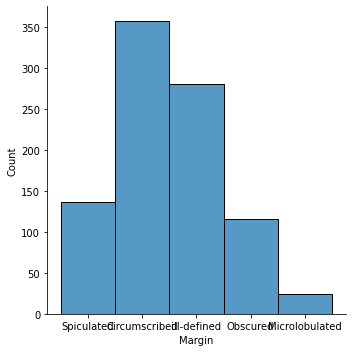

In [13]:
plt.figure(figsize=(10,10))
sns.displot(data=df_Practice.Margin)

In [14]:
df_Practice[["Margin", "Target"]].groupby(['Margin'], as_index=False).mean().sort_values(by='Target', ascending=False)

,Margin,Target
3,Spiculated,0.838235
4,ill-defined,0.682143
2,Obscured,0.629310
1,Microlobulated,0.625000
0,Circumscribed,0.114846


Thuộc tính `Margin` cũng có ảnh hưởng cao tới `Target`. Trong khi đường biên là `Spiculated` có khả năng là khối u ác tính cao thì `Circumscribed` có tỉ lệ rất thấp.

**Thuộc tính Density**

<Figure size 1152x720 with 0 Axes>

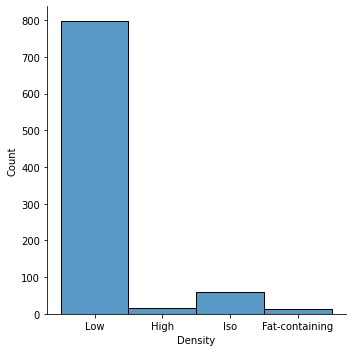

In [15]:
plt.figure(figsize=(16,10))
sns.displot(data=df_Practice.Density)

In [16]:
df_Practice[["Density", "Target"]].groupby(['Density'], as_index=False).mean().sort_values(by='Target', ascending=False)

,Density,Target
3,Low,0.492481
1,High,0.437500
0,Fat-containing,0.416667
2,Iso,0.305085


Thuộc tính Density có ảnh hưởng tới kết quả với `Density` là `Low, High, Fat-containing` có tỉ lệ ác tính cao hơn `Iso`

**Yêu cầu 4.4:** Đề xuất và Áp dụng các kỹ chuẩn hóa, tiền xử lý dữ liệu phù hợp cho tập dữ liệu này để có thể đưa vào các mô hình học máy và lưu kết quả dữ liệu sau xử lý ra file Data_Practice4_ok.csv 


**Xử lý giá trị missing của thuộc tính Density**

Thuộc tính Density ta thấy mật độ `Low` xuất hiện phổ biến ở cả 2 `Target` nên ở đây giá trị Low rất phù hợp cho cho dữ liệu missing

In [17]:
most_appearing_value = df_Practice.Density.mode().iloc[0]
print("Giá trị Density xuất hiện nhiều nhất là:", most_appearing_value)

Giá trị Density xuất hiện nhiều nhất là: Low


In [18]:
# Thay thế giá trị missing của Density
df_Practice.Density = df_Practice.Density.fillna('Low')

**Xử lý giá trị missing của thuộc tính Shape**

Ở thuộc tính `Shape` ta thấy:
- Hầu hết các giá trị `Irregular` đều là những bệnh nhân có khối ác tính
- Hầu hết các giá trị `Oval` là bệnh nhân có khối u lành tính.

=>Thay thế giá trị missing có `Target` = 1 là `Irregular`, `Target` = 0 là `Oval`

In [19]:
df_Practice.loc[(df_Practice.Shape.isnull()) & (df_Practice.Target == 0), 'Shape'] = 'Oval'
df_Practice.loc[(df_Practice.Shape.isnull()) & (df_Practice.Target == 1), 'Shape'] = 'Irregular'

**Xử lý missing thuộc tính Margin**
Ở thuộc tính `Margin` ta thấy:

- Giá trị `Spiculated` có tỉ lệ là khối ác tính cao
- Giá trị `Circumscribed` có tỉ lệ là khối ác tính rất thấp
=>Thay thế giá trị missing có Target = 1 là Spiculated, Target = 0 là Circumscribed

In [20]:
df_Practice.loc[(df_Practice.Margin.isnull()) & (df_Practice.Target == 0), 'Margin'] = 'Circumscribed'
df_Practice.loc[(df_Practice.Margin.isnull()) & (df_Practice.Target == 1), 'Margin'] = 'Spiculated'

**Xử lý missing value thuộc tính Age**
Thuộc tính Age chỉ có 5 giá trị missing chiếm 0.5% số lượng gá trị trên cột

=> Drop vì không ảnh hưởng nhiều tới kết quả

In [21]:
df_Practice.dropna(inplace=True)

In [22]:
# Kiểm tra số lượng các giá trị missing tại mỗi thuộc tính
df_Practice.isnull().sum()

Age        0
Shape      0
Margin     0
Density    0
Target     0
dtype: int64

**Chuyển đổi dữ liệu sang thuộc tính số**

In [23]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
df_Practice.Shape = ordinal_encoder.fit_transform(df_Practice[["Shape"]])
df_Practice.Margin = ordinal_encoder.fit_transform(df_Practice[["Margin"]])
df_Practice.Density = ordinal_encoder.fit_transform(df_Practice[["Density"]])

In [24]:
df_Practice.to_csv(r'Data/Data_Practice4_ok.csv', index = False)

# THỰC HÀNH 5

Tập dữ liệu mushroom.csv chứa dữ liệu của trên 8124 cây nấm, bao gồm 2 loại là nấm ăn được (e) và nấm độc (p).

**Yêu cầu:**
1. Nghiên cứu để hiểu tập dữ liệu Mushroom.csv
2. Đề xuất, áp dụng các kĩ thuật chuẩn hóa, tiền xử lý dữ liệu để có thể đưa vào các mô hình học máy
3. Lưu kết quả dữ liệu xử lý ra file Mushroom_ok.csv

- classes: edible=e, poisonous=p
- cap-shape: bell=b,conical=c, convex=x, flat=f, knobbed=k,sunken=s
- cap-surface: fibrous=f, grooves=g, scaly=y, smooth=s
- cap-color: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y
- bruises: bruises=t, no=f
- odor: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s
- gill-attachment: attached=a, descending=d, free=f, notched=n
- gill-spacing: close=c, crowded=w, distant=d
- gill-size: broad=b, narrow=n
- gill-color: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y
- stalk-shape: enlarging=e, tapering=t
- stalk-root: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=?
- stalk-surface-above-ring: fibrous=f, scaly=y, silky=k, smooth=s
- stalk-surface-below-ring: fibrous=f, scaly=y, silky=k, smooth=s
- stalk-color-above-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
- stalk-color-below-ring: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
- veil-type: partial=p, universal=u
- veil-color: brown=n, orange=o, white=w, yellow=y
- ring-number: none=n, one=o, two=t
- ring-type: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z
- spore-print-color: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y
- population: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y
- habitat: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
path = "Data/Mushroom.csv"
df_Mushroom = pd.read_csv(path)

In [26]:
df_Mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [27]:
#Xem xét dữ liệu null
df_Mushroom.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [28]:
# Xem xét số phần tử riêng biệt tại mỗi cột
df_Mushroom.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

Ta thấy `veil-type` chỉ có duy nhất một giá trị duy nhất nên có thể loại bỏ cột này khỏi tập dữ liệu

In [29]:
#create ordinal values for all categorical features
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_Mushroom = df_Mushroom.apply(label_encoder.fit_transform)

In [30]:
df_Mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [31]:
# drop veil-type col
df_Mushroom.drop(columns = ['veil-type'], inplace = True)

<AxesSubplot:title={'center':'BIỂU ĐỒ SỰ TƯƠNG QUAN'}>

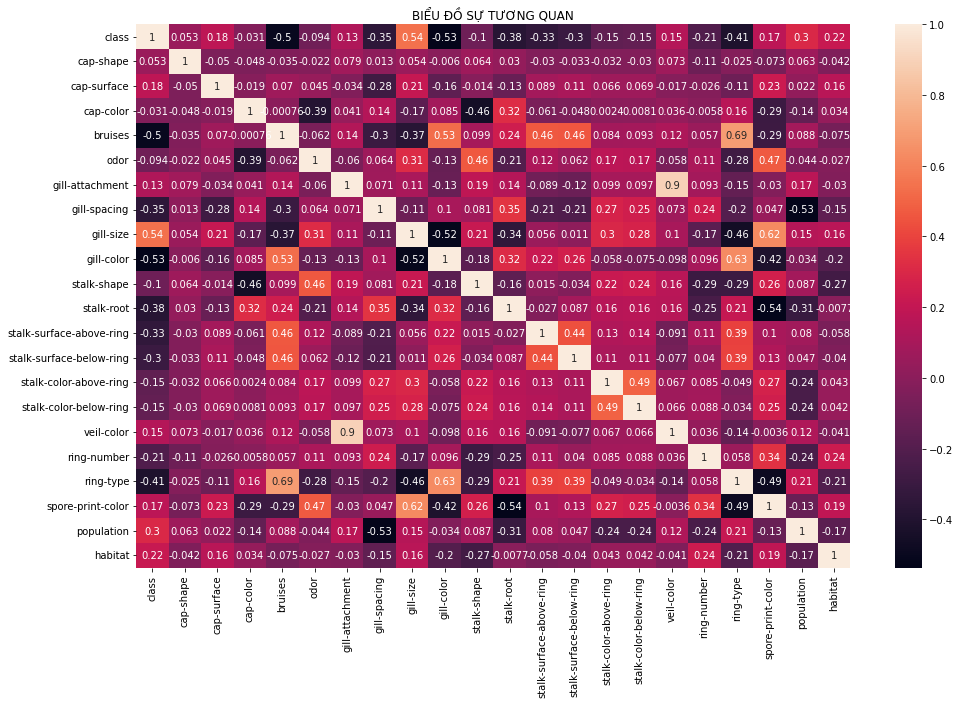

In [32]:
corr = df_Mushroom.corr()
plt.figure(figsize=(16,10))
plt.title('BIỂU ĐỒ SỰ TƯƠNG QUAN')
sns.heatmap(corr, annot=True)

Ta thấy:
- `gill-size` có mối tương quan với `class` cao nhất nên đây là một thuộc tính quan trọng cần đưa vào mô hình
- `bruises` và `ring-type`, `gill-color` và `ring-type`, `gill-spacing` và `veil-color`,... là những thuộc tính có mối tương quan cao với nhau, không cần thiết phải giữ cả 2, nên loại bỏ một trong số đó để giảm thời gian đào tạo mô hình.

In [33]:
#Sử dụng SelectKBest để lựa ra những thuộc tính cần thiết và loại bớt những thuộc tính không cần thiết
from sklearn.feature_selection import SelectKBest, mutual_info_classif
y = df_Mushroom['class']
X = df_Mushroom.drop(['class'], axis=1)
select = SelectKBest(score_func=mutual_info_classif, k=10)
z = select.fit_transform(X, y)
features = np.array(X.columns)
#check selected column
select.get_support()
selected_col = features[select.get_support()]
selected_col = np.append(selected_col, 'class')
print("Cột được chọn: \n", selected_col)


Cột được chọn: 
 ['odor' 'gill-size' 'gill-color' 'stalk-surface-above-ring'
 'stalk-surface-below-ring' 'stalk-color-above-ring'
 'stalk-color-below-ring' 'ring-type' 'spore-print-color' 'population'
 'class']


In [34]:
df_Mushroom = df_Mushroom[selected_col]
df_Mushroom.head()

,odor,gill-size,gill-color,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-type,spore-print-color,population,class
0,6,1,4,2,2,7,7,4,2,3,1
1,0,0,4,2,2,7,7,4,3,2,0
2,3,0,5,2,2,7,7,4,3,2,0
3,6,1,5,2,2,7,7,4,2,3,1
4,5,0,4,2,2,7,7,0,3,0,0


In [35]:
#xuất file đã xử lý
df_Mushroom.to_csv(r'Data/mushroom_ok.csv', index = False)